In [9]:
import sys
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import thicket as th
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [10]:
tk = th.Thicket.from_caliperreader(glob("../cali_files/sample/**/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 251/251 [00:01<00:00, 131.91it/s]
/home/alex/.local/lib/python3.10/site-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


In [11]:
tk.metadata.head()

cali.caliper.version  mpi.world.size  \
profile                                         
4074542                2.11.0             256   
30287862               2.11.0              32   
48721836               2.11.0              64   
73276465               2.11.0             512   
83238932               2.11.0             128   

                                               spot.metrics  \
profile                                                       
4074542   min#inclusive#sum#time.duration,max#inclusive#...   
30287862  min#inclusive#sum#time.duration,max#inclusive#...   
48721836  min#inclusive#sum#time.duration,max#inclusive#...   
73276465  min#inclusive#sum#time.duration,max#inclusive#...   
83238932  min#inclusive#sum#time.duration,max#inclusive#...   

         spot.timeseries.metrics  spot.format.version  \
profile                                                 
4074542                                             2   
30287862                                            2   
48721836                                            2   
73276465                                            2   
83238932                                            2   

                                               spot.options  spot.channels  \
profile                                                                      
4074542   time.variance,profile.mpi,node.order,region.co...  regionprofile   
30287862  time.variance,profile.mpi,node.order,region.co...  regionprofile   
48721836  time.variance,profile.mpi,node.order,region.co...  regionprofile   
73276465  time.variance,profile.mpi,node.order,region.co...  regionprofile   
83238932  time.variance,profile.mpi,node.order,region.co...  regionprofile   

         cali.channel spot:node.order                            spot:output  \
profile                                                                        
4074542          spot            true    p256-a16777216-ssample-irandom.cali   
30287862         spot            true    p32-a16777216-ssample-ireverse.cali   
48721836         spot            true     p64-a4194304-ssample-ireverse.cali   
73276465         spot            true   p512-a67108864-ssample-ireverse.cali   
83238932         spot            true  p128-a268435456-ssample-ireverse.cali   

         spot:profile.mpi spot:region.count spot:time.exclusive  \
profile                                                           
4074542              true              true                true   
30287862             true              true                true   
48721836             true              true                true   
73276465             true              true                true   
83238932             true              true                true   

         spot:time.variance  launchdate  \
profile                                   
4074542                true  1729586333   
30287862               true  1729584860   
48721836               true  1729584729   
73276465               true  1729586768   
83238932               true  1729586045   

                                                  libraries  \
profile                                                       
4074542   [/scratch/group/csce435-f24/Caliper/caliper/li...   
30287862  [/scratch/group/csce435-f24/Caliper/caliper/li...   
48721836  [/scratch/group/csce435-f24/Caliper/caliper/li...   
73276465  [/scratch/group/csce435-f24/Caliper/caliper/li...   
83238932  [/scratch/group/csce435-f24/Caliper/caliper/li...   

                                       cmdline cluster algorithm  \
profile                                                            
4074542     [./main, 16777216, sample, random]       c    sample   
30287862   [./main, 16777216, sample, reverse]       c    sample   
48721836    [./main, 4194304, sample, reverse]       c    sample   
73276465   [./main, 67108864, sample, reverse]       c    sample   
83238932  [./main, 268435456, sample, reverse]       c    sample   

         programming_mod

In [12]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

2.480 main
├─ 0.473 MPI_Comm_dup
├─ 0.048 MPI_Comm_split
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 0.082 comm
│  ├─ 0.044 comm_large
│  │  ├─ 0.005 MPI_Alltoall
│  │  ├─ 0.005 MPI_Alltoallv
│  │  ├─ 0.001 MPI_Gather
│  │  ├─ 0.029 MPI_Gatherv
│  │  └─ 0.005 MPI_Scatter
│  └─ 0.038 comm_small
│     └─ 0.038 MPI_Bcast
├─ 0.060 comp
│  ├─ 0.059 comp_large
│  └─ 0.001 comp_small
├─ 0.002 correctness_check
└─ 0.073 data_init_runtime
   └─ 0.070 MPI_Gather

Legend (Metric: Avg time/rank Min: 0.00 Max: 2.48 indices: {'profile': 4074542})
█ 2.23 - 2.48
█ 1.74 - 2.23
█ 1.24 - 1.74
█ 0.74 - 1.24
█ 0.25 - 0.74
█ 0.00 - 0.25

name User code    ◀  Only in left graph    ▶  Only in right graph



In [13]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("input_size")
tk.dataframe = tk.dataframe.reset_index()
tk.dataframe.head()

node   profile  nid   spot.channel  \
0  {'name': 'main', 'type': 'function'}   4074542  1.0  regionprofile   
1  {'name': 'main', 'type': 'function'}  30287862  1.0  regionprofile   
2  {'name': 'main', 'type': 'function'}  48721836  1.0  regionprofile   
3  {'name': 'main', 'type': 'function'}  73276465  1.0  regionprofile   
4  {'name': 'main', 'type': 'function'}  83238932  1.0  regionprofile   

   Min time/rank  Max time/rank  Avg time/rank   Total time  \
0       2.471747       2.487463       2.479850   634.841710   
1       2.433209       2.440840       2.437341    77.994916   
2       1.767201       1.777018       1.772100   113.414400   
3       5.105792       5.612884       5.571358  2852.535385   
4      11.751528      11.771779      11.758841  1505.131601   

   Variance time/rank  Min time/rank (exc)  Max time/rank (exc)  \
0            0.000015             1.694945             1.773140   
1            0.000008             1.494449             1.503860   
2            0.000008             1.561991             1.583421   
3            0.001491             2.000105             2.477034   
4            0.000019             1.591680             1.634214   

   Avg time/rank (exc)  Total time (exc)  Calls/rank (min)  Calls/rank (avg)  \
0             1.743048        446.220217               NaN               NaN   
1             1.499807         47.993839               NaN               NaN   
2             1.570252        100.496098               NaN               NaN   
3             2.089634       1069.892811               NaN               NaN   
4             1.612970        206.460188               NaN               NaN   

   Calls/rank (max)  Calls/rank (total)  name  num_procs input_type  \
0               NaN                 NaN  main        256     random   
1               NaN                 NaN  main         32    reverse   
2               NaN                 NaN  main         64    reverse   
3               NaN                 NaN  main        512    reverse   
4               NaN                 NaN  main        128    reverse   

   input_size  
0    16777216  
1    16777216  
2     4194304  
3    67108864  
4   268435456

In [14]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line",
    marker='o',
    title=title,
    xlabel=xlabel,
    ylabel=ylabel,
    figsize=(15,7)
    )
    return plot

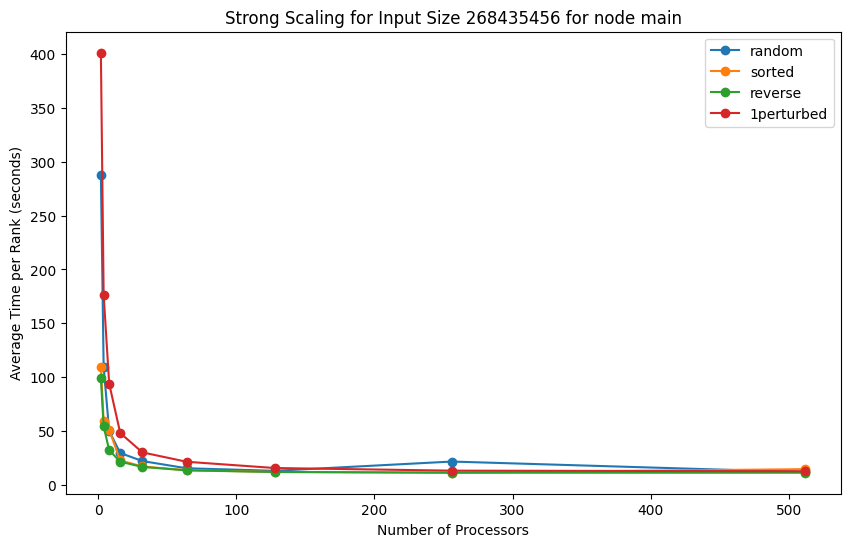

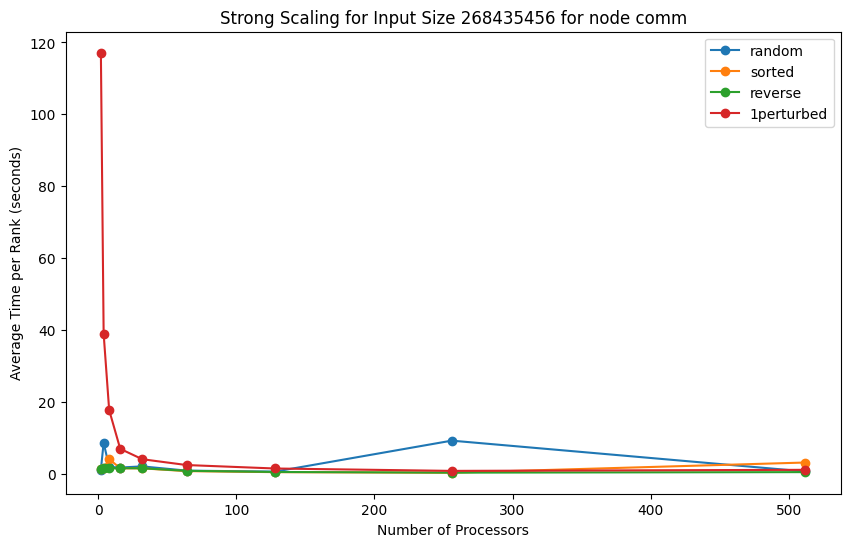

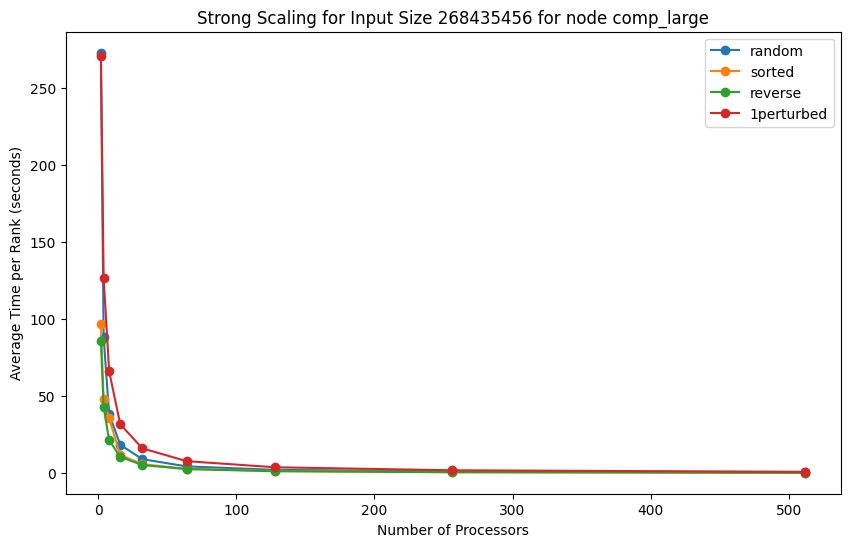

In [15]:
input_sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]
# input_sizes = [268435456]

# Function to create strong scaling plots
def plot_strong_scaling(tk, input_sizes):
    for node in tk.graph.traverse():
        node_name = node.frame['name']
        if (node_name == 'comp_large') or (node_name == 'comm') or (node_name == 'main'):
            for input_size in input_sizes:
                fig, ax = plt.subplots(figsize=(10, 6))
                for input_type in ["random", "sorted", "reverse", "1perturbed"]:
                    data = tk.dataframe[(tk.dataframe["input_type"] == input_type) & (tk.dataframe["input_size"] == input_size) & (tk.dataframe['node'] == node)]
                    data = data.sort_values(by="num_procs")
                    ax.plot(data["num_procs"], data["Avg time/rank"], marker='o', label=input_type)
                ax.set_title(f'Strong Scaling for Input Size {input_size} for node {node_name}')
                ax.set_xlabel('Number of Processors')
                ax.set_ylabel('Average Time per Rank (seconds)')
                ax.legend()
                plt.show()

plot_strong_scaling(tk, input_sizes)

In [16]:
tk.dataframe = tk.dataframe.reset_index()#.set_index(["node"])
tk.dataframe

index                                               node     profile  \
0         0               {'name': 'main', 'type': 'function'}     4074542   
1         1               {'name': 'main', 'type': 'function'}    30287862   
2         2               {'name': 'main', 'type': 'function'}    48721836   
3         3               {'name': 'main', 'type': 'function'}    73276465   
4         4               {'name': 'main', 'type': 'function'}    83238932   
5         5               {'name': 'main', 'type': 'function'}    94794268   
6         6               {'name': 'main', 'type': 'function'}   110512547   
7         7               {'name': 'main', 'type': 'function'}   113737997   
8         8               {'name': 'main', 'type': 'function'}   123551920   
9         9               {'name': 'main', 'type': 'function'}   128125911   
10       10               {'name': 'main', 'type': 'function'}   232689273   
11       11               {'name': 'main', 'type': 'function'}   251187489   
12       12               {'name': 'main', 'type': 'function'}   272784848   
13       13               {'name': 'main', 'type': 'function'}   288008930   
14       14               {'name': 'main', 'type': 'function'}   310653058   
15       15               {'name': 'main', 'type': 'function'}   324567128   
16       16               {'name': 'main', 'type': 'function'}   324936820   
17       17               {'name': 'main', 'type': 'function'}   333285392   
18       18               {'name': 'main', 'type': 'function'}   335573677   
19       19               {'name': 'main', 'type': 'function'}   342347722   
20       20               {'name': 'main', 'type': 'function'}   343206401   
21       21               {'name': 'main', 'type': 'function'}   353484104   
22       22               {'name': 'main', 'type': 'function'}   377343736   
23       23               {'name': 'main', 'type': 'function'}   388783352   
24       24               {'name': 'main', 'type': 'function'}   391902226   
25       25               {'name': 'main', 'type': 'function'}   402922748   
26       26               {'name': 'main', 'type': 'function'}   408944340   
27       27               {'name': 'main', 'type': 'function'}   418345927   
28       28               {'name': 'main', 'type': 'function'}   463644714   
29       29               {'name': 'main', 'type': 'function'}   466594677   
30       30               {'name': 'main', 'type': 'function'}   475104867   
31       31               {'name': 'main', 'type': 'function'}   479077862   
32       32               {'name': 'main', 'type': 'function'}   492588456   
33       33               {'name': 'main', 'type': 'function'}   535319331   
34       34               {'name': 'main', 'type': 'function'}   551564675   
35       35               {'name': 'main', 'type': 'function'}   566834812   
36       36               {'name': 'main', 'type': 'function'}   569765686   
37       37               {'name': 'main', 'type': 'function'}   580689707   
38       38               {'name': 'main', 'type': 'function'}   605286288   
39       39               {'name': 'main', 'type': 'function'}   637698348   
40       40               {'name': 'main', 'type': 'function'}   690777187   
41       41               {'name': 'main', 'type': 'function'}   712011081   
42       42               {'name': 'main', 'type': 'function'}   717735477   
43       43               {'name': 'main', 'type': 'function'}   755150530   
44       44               {'name': 'main', 'type': 'function'}   812855146   
45       45               {'name': 'main', 'type': 'function'}   848880650   
46       46               {'name': 'main', 'type': 'function'}   856758673   
47       47               {'name': 'main', 'type': 'function'}   895139844   
48       48               {'name': 'main', 'type': 'function'}   964283977   
49       49               {'name': 'main', 'type': 'function'}   967039960   
50       50               {'